In [ ]:
# Run the same code as previous analysis but will use PRAW to scrape reddit instead

In [ ]:
!pip install praw

In [ ]:
# Import libraries
from praw import Reddit
import os
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from google.colab import files
from datetime import datetime as dt

In [ ]:
# Uploading the credentials to use reddit agent
uploaded = files.upload()

In [4]:
# Create scraping agent
df = pd.read_csv('reddit_scraping.csv')
reddit = Reddit(client_id=df['client_id'][0], client_secret=df['secret'][0], user_agent=df['user_agent'][0])

In [ ]:
subreddits = ['wallstreetbets', 'stocks']
posts = []
# Get top 20 hot post
subreddit_instance = reddit.subreddit('+'.join(subreddits))
for post in subreddit_instance.hot(limit=20):
  utc = dt.utcfromtimestamp(post.created_utc).strftime('%Y-%m-%d %H:%M:%S')
  date = utc.split(' ')[0]
  time = utc.split(' ')[1]
  posts.append([date, time, f"r/{post.subreddit}", post.title, post.selftext, post.num_comments, post.score, post.upvote_ratio, 
                f"https://www.reddit.com/r/{post.subreddit}/comments/{post.id}"])
df = pd.DataFrame(posts,columns=['Date', 'Time', 'Subreddit', 'Title', 'Body', 'Num_comments', 'Upvotes', 'Vote_ratio', 'Url'])

In [59]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Apply Vader sentiment analysis to headlines
scores = df['Title'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
df = df.join(scores_df, rsuffix='_right')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

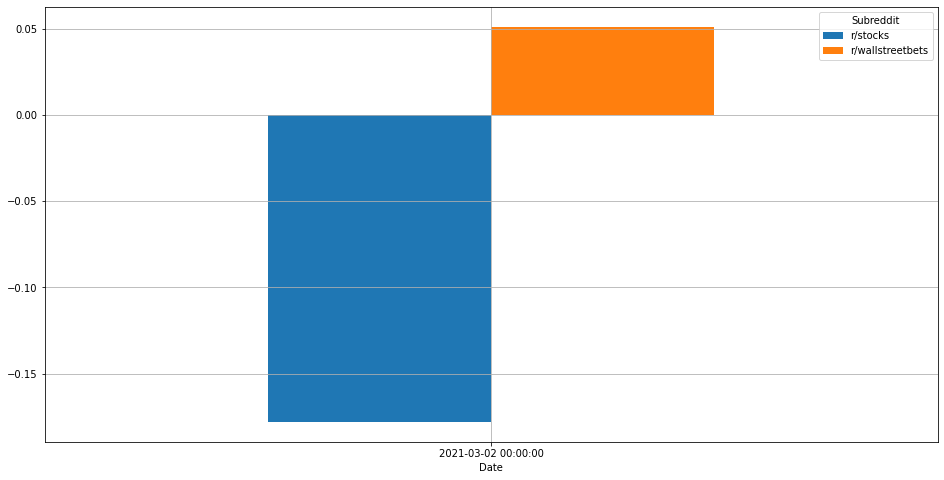

In [61]:
# Group the scores by ticker and date
mean_scores = df.groupby(by=['Subreddit', 'Date']).mean()
mean_scores = mean_scores.unstack()
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
# Plot a bar graph
plt.rcParams['figure.figsize'] = [16, 8]
mean_scores.plot.bar(rot=0)
plt.grid()

In [62]:
df.sort_index(ascending=False)
df

,Time,Subreddit,Title,Body,Num_comments,Upvotes,Vote_ratio,Url,neg,neu,pos,compound
Date,,,,,,,,,,,,
2021-03-02,23:21:20,r/wallstreetbets,u/SquishedPeter's Cat Megathread for March 2nd...,,1279,19754,0.94,https://www.reddit.com/r/wallstreetbets/commen...,0.000,1.000,0.000,0.0000
2021-03-02,16:04:46,r/stocks,Serious Question: If 99% of first-time day tra...,I hear it all the time - That first-time day t...,971,3752,0.90,https://www.reddit.com/r/stocks/comments/lw5fn3,0.186,0.814,0.000,-0.5859
2021-03-02,22:47:37,r/wallstreetbets,Shout out to the diamond hands,,678,11844,0.97,https://www.reddit.com/r/wallstreetbets/commen...,0.000,0.676,0.324,0.3400
2021-03-02,21:03:14,r/wallstreetbets,RKT YOLO update - Mar 2 2021 - this aged well,,1590,20682,0.86,https://www.reddit.com/r/wallstreetbets/commen...,0.000,0.549,0.451,0.6037
2021-03-02,22:47:15,r/wallstreetbets,Guess I am going to work tomorrow 😭💎🤲,,90,5815,0.99,https://www.reddit.com/r/wallstreetbets/commen...,0.000,1.000,0.000,0.0000
2021-03-02,19:29:18,r/wallstreetbets,"$181,840 gain in 4 hours from $RKT. Time to gi...",,2192,32470,0.80,https://www.reddit.com/r/wallstreetbets/commen...,0.000,0.815,0.185,0.5267
2021-03-02,17:19:17,r/stocks,I forgot my own strategy!,"Ok so I’ve been trading for about two years, I...",217,949,0.94,https://www.reddit.com/r/stocks/comments/lw7bj2,0.000,1.000,0.000,0.0000
2021-03-02,17:46:39,r/wallstreetbets,UPDATE. $GME broke through the pennant. Next s...,,1715,20331,0.93,https://www.reddit.com/r/wallstreetbets/commen...,0.357,0.643,0.000,-0.6124
2021-03-02,20:19:03,r/wallstreetbets,"I can't trust $RKT, it's just too suspicious w...",,1313,6234,0.91,https://www.reddit.com/r/wallstreetbets/commen...,0.250,0.577,0.173,-0.1536
